In [1]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

Using TensorFlow backend.


17457152/17464789 [============================>.] - ETA: 0s

In [2]:

print(X.shape)
print(y.shape)

(50000,)
(50000,)


In [3]:
print(numpy.unique(y))

[0 1]


In [4]:
print(len(numpy.unique(numpy.hstack(X))))

88585


In [6]:
#print(len(numpy.unique(numpy.vstack(X))))
#hstack due to axis mismatch

Review length: 
Mean 234.76 words (172.911495)


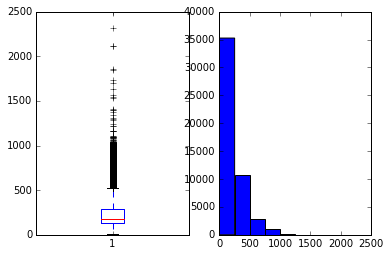

In [7]:
# Summarize review length
print("Review length: ")
result = map(len, X)
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length as a boxplot and histogram
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

In [9]:
# MLP for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


In [10]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [19]:
X_train[0:22,0:20]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 687,   23,    4,    2,    2,    6, 3693,   42,   38,   39,  121,
          59,  456,   10,   10,    7,  265,   12,  575,  111],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   4, 3231,  152,  339,    2,   4

In [11]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# restrict reviews to 500 owrds.. longer ones are truncated ..shorter ones padded..

In [12]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words)) #Embedding
#Turns positive integers (indexes) into dense vectors of fixed size
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 42s - loss: 0.5206 - acc: 0.7051 - val_loss: 0.2974 - val_acc: 0.8722
Epoch 2/2
25000/25000 [==============================] - 41s - loss: 0.1936 - acc: 0.9240 - val_loss: 0.3187 - val_acc: 0.8675


In [14]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.75%


In [15]:
X_train.shape

(25000, 500)

In [17]:
X_train[0:2,0:20]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [20]:
#1D CNN
# 2D CNN would honor the spatial structure in image data while being robust to the position and orientation of learned objects in the scene.
# same priciples run the 1D etc..

In [21]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Trainable params: 2,163,605
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
48s - loss: 0.4870 - acc: 0.7188 - val_loss: 0.2934 - val_acc: 0.8757
Epoch 2/2
48s - loss: 0.2359 - acc: 0.9059 - val_loss: 0.2941 - val_acc: 0.8771


In [23]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)